In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import scoring_utils

In [2]:
df = pd.read_csv('../data/data_clean.csv')

df.head(1)

,City,State,Bank,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,GrAppv,SBA_Appv,Default,NAICS_i,isNewBusiness,isFranchise,SBARatio,InterestRate
0,EVANSVILLE,IN,FIFTH THIRD BANK,1997,84,4,0,0,1,0,0,1,60000.0,48000.0,0,45,1.0,0,0.8,5.19


In [3]:
# one-hot encode UrbanRural and include it
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(sparse=False,handle_unknown='ignore')

UR_encoded = OHE.fit_transform(df[['UrbanRural']])
UR_enc_df = pd.DataFrame(UR_encoded,columns = OHE.get_feature_names_out(['UrbanRural']))
df = pd.concat([df,UR_enc_df], axis=1)
df.drop(columns=['UrbanRural'])
df.head(5)


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,City,State,Bank,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,...,SBA_Appv,Default,NAICS_i,isNewBusiness,isFranchise,SBARatio,InterestRate,UrbanRural_0,UrbanRural_1,UrbanRural_2
0,EVANSVILLE,IN,FIFTH THIRD BANK,1997,84,4,0,0,1,0,...,48000.0,0,45,1.0,0,0.80,5.19,1.0,0.0,0.0
1,NEW PARIS,IN,1ST SOURCE BANK,1997,60,2,0,0,1,0,...,32000.0,0,72,1.0,0,0.80,5.19,1.0,0.0,0.0
2,BLOOMINGTON,IN,GRANT COUNTY STATE BANK,1997,180,7,0,0,1,0,...,215250.0,0,62,0.0,0,0.75,5.19,1.0,0.0,0.0
3,BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,1997,60,2,0,0,1,0,...,28000.0,0,0,0.0,0,0.80,5.19,1.0,0.0,0.0
4,ORLANDO,FL,FLORIDA BUS. DEVEL CORP,1997,240,14,7,7,1,0,...,229000.0,0,0,0.0,0,1.00,5.19,1.0,0.0,0.0


In [4]:
# Select Features (X) and Target (Y)
#X = df[['ApprovalFY','Term','NoEmp','CreateJob','RetainedJob','FranchiseCode','UrbanRural','RevLineCr','LowDoc','GrAppv','SBA_Appv','NAICS_i','isNewBusiness','isFranchise','SBARatio','InterestRate']]

dropped_features = ['Default','City','State','Bank','ApprovalFY']
X = df.drop(columns=dropped_features)
Y = df['Default']


In [5]:
# Do a train-test split
X_train, X_tmp, y_train, y_tmp = train_test_split(X,Y,test_size=0.2,random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_tmp, y_tmp)



In [6]:
# Scale Features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [18]:
pd.DataFrame(X_train_scaled, columns=X.columns).describe()

,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,GrAppv,SBA_Appv,NAICS_i,isNewBusiness,isFranchise,SBARatio,InterestRate,UrbanRural_0,UrbanRural_1,UrbanRural_2
count,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05,6.964110e+05
mean,6.286531e-17,8.347904e-18,-6.645929e-18,7.185408e-18,-3.118268e-17,-3.235347e-17,-1.900804e-17,-6.153446e-17,-3.580716e-17,1.460803e-17,-3.647545e-17,-1.241441e-16,2.965479e-17,-4.619016e-16,8.095598e-16,-7.729798e-17,-8.830183e-17,-9.826690e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.408489e+00,-1.561132e-01,-3.587840e-02,-4.554959e-02,-2.172193e-01,-1.165417e+00,-5.453491e-01,-3.759238e-01,-6.821690e-01,-6.592970e-01,-1.498397e+00,-6.271352e-01,-2.488556e-01,-3.945501e+00,-1.763142e+00,-7.538420e-01,-1.041415e+00,-3.646489e-01
25%,-6.510141e-01,-1.288318e-01,-3.587840e-02,-4.554959e-02,-2.171413e-01,-1.165417e+00,-5.453491e-01,-3.759238e-01,-5.628142e-01,-5.633310e-01,-6.261984e-01,-6.271352e-01,-2.488556e-01,-1.221514e+00,-9.678847e-01,-7.538420e-01,-1.041415e+00,-3.646489e-01
50%,-3.480241e-01,-1.015504e-01,-3.587840e-02,-4.138073e-02,-2.171413e-01,3.781707e-01,-5.453491e-01,-3.759238e-01,-3.556985e-01,-3.833947e-01,1.701565e-01,-6.271352e-01,-2.488556e-01,2.217031e-01,2.569941e-01,-7.538420e-01,9.602321e-01,-3.646489e-01
75%,1.064608e-01,-1.970616e-02,-3.170368e-02,-2.887415e-02,-2.171413e-01,3.781707e-01,-5.453491e-01,-3.759238e-01,1.217207e-01,1.106122e-01,6.252164e-01,1.594553e+00,-2.488556e-01,7.989901e-01,6.317704e-01,1.326538e+00,9.602321e-01,-3.646489e-01
max,5.042673e+00,1.362373e+02,3.670166e+01,3.955860e+01,7.580943e+00,1.921758e+00,1.833688e+00,2.660113e+00,1.686650e+01,1.896794e+01,1.990396e+00,1.594553e+00,4.018394e+00,1.664921e+00,6.934412e+00,1.326538e+00,9.602321e-01,2.742364e+00


In [19]:
model = LogisticRegression(C=0.1)
model.fit(X_train_scaled, y_train)



LogisticRegression()

In [21]:
coefficients = model.coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coef_df)

          Feature  Coefficient
0            Term    -2.088379
1           NoEmp    -0.732712
2       CreateJob     0.349295
3     RetainedJob    -0.250220
4   FranchiseCode    -0.043616
5      UrbanRural     0.234212
6       RevLineCr    -0.087535
7          LowDoc    -0.321655
8          GrAppv     0.770199
9        SBA_Appv    -0.637445
10        NAICS_i     0.119410
11  isNewBusiness     0.008960
12    isFranchise     0.075786
13       SBARatio     0.307055
14   InterestRate     0.503279
15   UrbanRural_0    -0.320001
16   UrbanRural_1     0.312067
17   UrbanRural_2    -0.006483


In [20]:
#make predictions
yhat_train = model.predict(X_train)
yhat_cv = model.predict(X_cv)

score = pd.concat([
    scoring_utils.get_metrics(y_train, yhat_train, "Logit Train"),
    scoring_utils.get_metrics(y_cv, yhat_cv, "Logit CV")
])

score

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Recall,Precision,ROC,F1
Logit Train,0.999740,0.171523,0.499952,0.292809
Logit CV,0.999643,0.171464,0.499900,0.292720


In [9]:
model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [10]:
X_train.head(10)

,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,GrAppv,SBA_Appv,NAICS_i,isNewBusiness,isFranchise,SBARatio,InterestRate,UrbanRural_0,UrbanRural_1,UrbanRural_2
718500,72,1,0,0,1,0,0,1,98500.0,88650.0,0,0.0,0,0.90,4.76,1.0,0.0,0.0
550764,52,4,0,0,1,2,0,0,225000.0,168750.0,33,0.0,0,0.75,1.74,0.0,0.0,1.0
508011,60,26,0,0,1,0,0,0,700000.0,595000.0,33,0.0,0,0.85,3.22,1.0,0.0,0.0
136985,240,18,6,0,1,0,0,0,227000.0,227000.0,44,0.0,0,1.00,5.49,1.0,0.0,0.0
781995,84,4,0,0,1,0,0,1,100000.0,90000.0,53,0.0,0,0.90,5.80,1.0,0.0,0.0
623598,240,71,11,60,1,1,0,0,343000.0,343000.0,72,0.0,0,1.00,1.22,0.0,1.0,0.0
836134,24,30,0,30,1,1,1,0,250000.0,125000.0,31,0.0,0,0.50,4.00,0.0,1.0,0.0
265559,84,4,0,4,0,1,1,0,10000.0,5000.0,72,1.0,0,0.50,3.94,0.0,1.0,0.0
811043,300,10,0,0,1,0,0,0,281700.0,211275.0,54,0.0,0,0.75,5.22,1.0,0.0,0.0
276273,84,10,0,10,0,1,1,0,20000.0,10000.0,72,0.0,0,0.50,2.98,0.0,1.0,0.0


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [12]:
import scoring_utils
yhat_test = model.predict(X_test)
scoring_utils.get_metrics(y_test, yhat_test, "Logit Test")

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Recall,Precision,ROC,F1
Logit Test,0.99973,0.17014,0.499879,0.290791


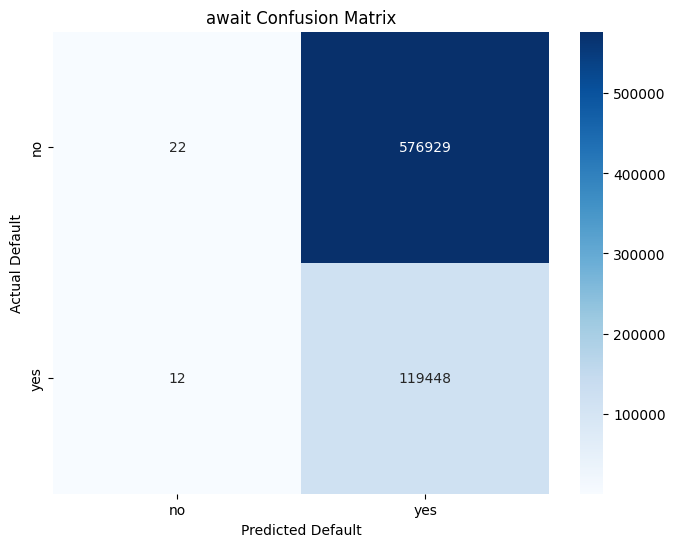

In [13]:
scoring_utils.get_confusion_matrix(y_train, yhat_train, "await")